In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 90.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=95d7adf65b4739b42a5a4a600c086843019c00fe33e770ec60579db0399d863e
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninst

In [5]:
import yfinance as yf

# Extract Tesla stock data
ticker = 'TSLA'
tesla_data = yf.download(ticker)

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Display the first five rows
print(tesla_data_reset.head())

# Save to a CSV file
tesla_data_reset.to_csv('tesla_data.csv', index=False)



[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page to scrape
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Perform a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Find the table containing the revenue data
table = soup.find_all('table')[1]  # Select the second table on the page

# Extract table rows
rows = table.find_all('tr')

# Extract the headers
headers = ["Date", "Tesla Quarterly Revenue(Millions of US $)"]

# Extract the data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    # Skip rows that don't have enough data
    if len(cols) == 2:
        data.append([col.text.strip() for col in cols])

# Create a DataFrame
tesla_revenue = pd.DataFrame(data, columns=headers)

# Display the last five rows
print(tesla_revenue.tail())



          Date Tesla Quarterly Revenue(Millions of US $)
49  2010-06-30                                       $28
50  2010-03-31                                       $21
51  2009-12-31                                          
52  2009-09-30                                       $46
53  2009-06-30                                       $27


In [14]:
import yfinance as yf
import pandas as pd

# Ticker symbol for GameStop
ticker = "GME"

# Fetch historical data using yfinance
gme_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

# Display the last few rows of the data
print(gme_data.tail())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-12-22  16.780001  17.200001  16.450001  16.969999  16.969999  3325100
2023-12-26  16.980000  17.410000  16.820000  17.360001  17.360001  3079600
2023-12-27  17.430000  18.370001  17.370001  18.370001  18.370001  4800100
2023-12-28  18.049999  18.320000  17.850000  18.070000  18.070000  3574800
2023-12-29  18.040001  18.160000  17.459999  17.530001  17.530001  4524200


In [16]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page to scrape
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Perform a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the revenue data
table = soup.find_all('table')[0]  # Assuming the first table contains the revenue data

# Extract table rows
rows = table.find_all('tr')

# Extract the headers
headers = ["Date", "gamestop Quarterly Revenue(Millions of US $)"]

# Extract the data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

# Create a DataFrame
gme_revenue = pd.DataFrame(data, columns=headers)

# Display the data
print(gme_revenue)


    Date gamestop Quarterly Revenue(Millions of US $)
0   2020                                       $6,466
1   2019                                       $8,285
2   2018                                       $8,547
3   2017                                       $7,965
4   2016                                       $9,364
5   2015                                       $9,296
6   2014                                       $9,040
7   2013                                       $8,887
8   2012                                       $9,551
9   2011                                       $9,474
10  2010                                       $9,078
11  2009                                       $8,806
12  2008                                       $7,094
13  2007                                       $5,319
14  2006                                       $3,092
15  2005                                       $1,843


[*********************100%%**********************]  1 of 1 completed


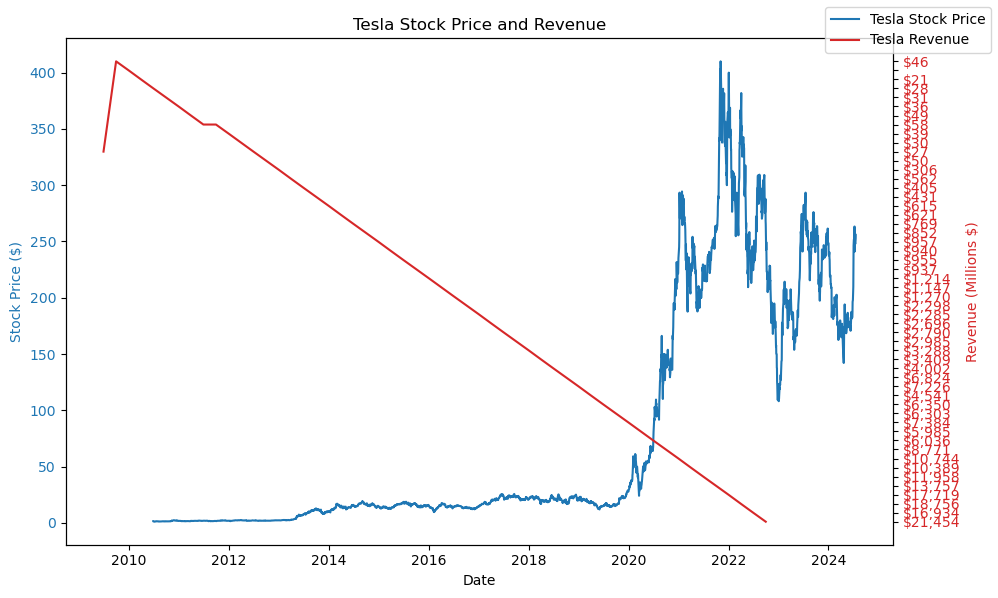

In [24]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch Tesla Stock Data
ticker = 'TSLA'
tesla_data = yf.download(ticker)

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Step 2: Fetch Tesla Revenue Data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")

# Find the table containing the revenue data
table = soup.find_all('table')[1]  # Select the second table on the page

# Extract table rows
rows = table.find_all('tr')

# Extract the headers
headers = ["Date", "Tesla Quarterly Revenue(Millions of US $)"]

# Extract the data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 2:
        data.append([col.text.strip() for col in cols])

# Create a DataFrame for revenue data
tesla_revenue = pd.DataFrame(data, columns=headers)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Plotting Stock Closing Price and Revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Stock Closing Price
ax1.plot(tesla_data_reset['Date'], tesla_data_reset['Close'], color='tab:blue', label='Tesla Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for Revenue
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'], color='tab:red', label='Tesla Revenue')
ax2.set_ylabel('Revenue (Millions $)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and Legend
plt.title('Tesla Stock Price and Revenue')
fig.tight_layout()
fig.legend(loc="upper right")

plt.show()



[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-12-22  16.780001  17.200001  16.450001  16.969999  16.969999  3325100
2023-12-26  16.980000  17.410000  16.820000  17.360001  17.360001  3079600
2023-12-27  17.430000  18.370001  17.370001  18.370001  18.370001  4800100
2023-12-28  18.049999  18.320000  17.850000  18.070000  18.070000  3574800
2023-12-29  18.040001  18.160000  17.459999  17.530001  17.530001  4524200


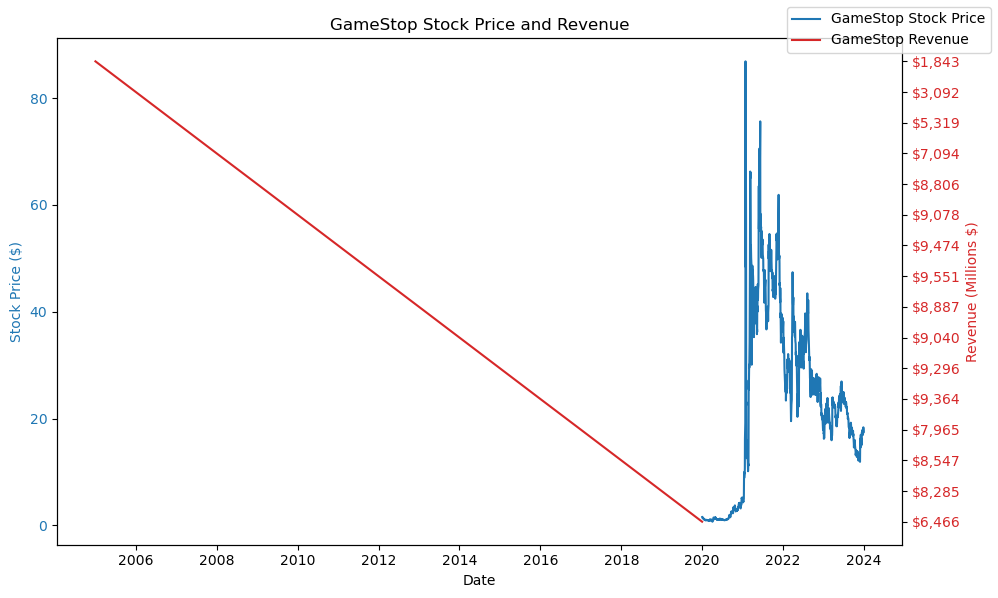

In [28]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Fetch GameStop Stock Data
ticker = "GME"
gme_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

# Display the last few rows of the stock data
print(gme_data.tail())

# URL of the page to scrape for revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Perform a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the revenue data
table = soup.find_all('table')[0]  # Assuming the first table contains the revenue data

# Extract table rows
rows = table.find_all('tr')

# Extract the headers
headers = ["Date", "GameStop Quarterly Revenue(Millions of US $)"]

# Extract the data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    data.append([col.text.strip() for col in cols])

# Create a DataFrame for revenue data
gme_revenue = pd.DataFrame(data, columns=headers)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Plotting Stock Closing Price and Revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Stock Closing Price
ax1.plot(gme_data.index, gme_data['Close'], color='tab:blue', label='GameStop Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for Revenue
ax2 = ax1.twinx()
ax2.plot(gme_revenue['Date'], gme_revenue['GameStop Quarterly Revenue(Millions of US $)'], color='tab:red', label='GameStop Revenue')
ax2.set_ylabel('Revenue (Millions $)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and Legend
plt.title('GameStop Stock Price and Revenue')
fig.tight_layout()
fig.legend(loc="upper right")

plt.show()
